In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data.csv',sep =',')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.shape

(569, 33)

In [6]:
df.dropna(axis=1, inplace=True)

In [7]:
df.shape

(569, 32)

In [8]:
df.drop_duplicates()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
#dropar o id pq nao tem relevância no cálculo
df.drop(columns='id', inplace=True)

In [10]:
alvo = df.diagnosis

In [11]:
previsores = df.drop(columns='diagnosis')

In [12]:
alvo = alvo.map({'M':1,
               'B':0})

In [13]:
alvo= alvo.values

In [14]:
previsores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [15]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [16]:
previsores_red = PCA(n_components=10).fit_transform(previsores_esc)

In [17]:
previsores_esc.shape

(569, 30)

In [18]:
previsores_red.shape

(569, 10)

In [116]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc,alvo,
                                                        test_size=0.3,
                                                        random_state=10)

In [117]:
x_treino.shape

(398, 30)

In [118]:
x_teste.shape

(171, 30)

In [119]:
y_treino.shape

(398,)

In [120]:
y_teste.shape

(171,)

In [185]:
redes = MLPClassifier(hidden_layer_sizes=(15,15), activation='relu', solver='adam', max_iter =800,tol=0.0001, random_state = 3)
#lbfgs,sgd,adam
#relu, identity, logistic,tanh

In [186]:
redes.fit(x_treino,y_treino)

MLPClassifier(hidden_layer_sizes=(15, 15), max_iter=800, random_state=3)

In [187]:
previsoes = redes.predict(x_teste)

In [197]:
acurácia_teste = round(accuracy_score(y_teste,previsoes),2)
acurácia_teste

0.99

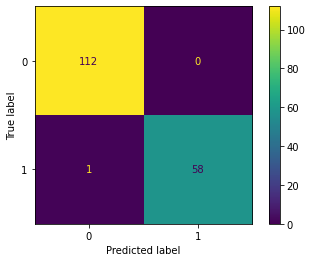

In [189]:
ConfusionMatrixDisplay.from_predictions(y_teste,previsoes)

In [190]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       112
           1       1.00      0.98      0.99        59

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [191]:
previsoes_treino = redes.predict(x_treino)

In [199]:
acurácia_treino = round(accuracy_score(y_treino,previsoes_treino),2)
acurácia_treino

1.0

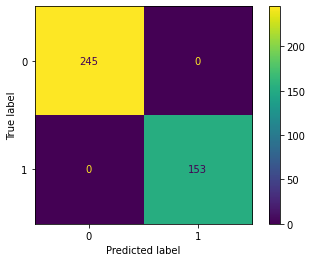

In [193]:
ConfusionMatrixDisplay.from_predictions(y_treino,previsoes_treino)

In [194]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [195]:
modelo = redes

In [196]:
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 94.55%


Redes Neurais

- ***Acurácia : base teste : 99% ; base treino : 100%***

- ***Acurácia Média : 94.55%***

-----------------------------------------------------------------------------------------------------
Naive Bayes

Acurácia, utilizando Naive Bayes : 91.2% e na base de treino : 89.7%

(MELHOR)Acurácia, utilizando Naive Bayes, com a base de dados escalonada : 91.2% e na base de treino : 92.7%
- 91.2


-----------------------------------------------------------------------------------------------------
***SVM*** Algoritimo Vencedor

Acurácia, utilizando Máquinas de Vetores de Suporte : 95.89999999999999% e na base de treino : 91.2%

(MELHOR)Acurácia, utilizando Máquinas de Vetores de Suporte, com a base de dados escalonada : 98.2% e na base de treino : 98.7%

-98.2


-----------------------------------------------------------------------------------------------------
Regressão Logística

(MELHOR)Acurácia, utilizando Regressão Logística : 95.89999999999999% e na base de treino : 95.7%

Acurácia, utilizando Regressão Logística, com a base de dados escalonada : 95.89999999999999% 
e na base de treino : 92.7%
- 95.9


-----------------------------------------------------------------------------------------------------
KNN

Acurácia, utilizando Aprendizagem Baseada em Instâncias : 94.69999999999999% e na base de treino : 94.0%

(MELHOR) Acurácia, utilizando Aprendizagem Baseada em Instâncias, com a base de dados escalonada : 96.5% e na base de treino : 92.7%
- 96.5


-----------------------------------------------------------------------------------------------------
Árvores de Classificação

(MELHOR) Acurácia, utilizando Árvores de Classificação: 93.60000000000001% e na base de treino : 97.7%

Acurácia, utilizando Árvores de Classificação, com a base de dados escalonada : 90.10000000000001% e na base de treino : 92.7%

- 97.7


-----------------------------------------------------------------------------------------------------
Floresta Randômica

(MELHOR)Acurácia, utilizando Floresta Radômica : 97.7% e na base de treino : 100.0%

Acurácia, utilizando Floresta Radômica, com a base de dados escalonada : 92.4% e na base de treino : 92.7%

- 97.7



-----------------------------------------------------------------------------------------------------
XGBOOST

(MELHOR)Acurácia, utilizando XGBOOST : 95.3% e na base de treino : 100.0%

Acurácia, utilizando XGBOOST, com a base de dados escalonada : 93.0% e na base de treino : 92.7%

OBS: Não é a melhor Acurácia, mas são as mais pŕoximas da base de teste com a base de treino.


- 95.3


-----------------------------------------------------------------------------------------------------
LightBoost

Acurácia, utilizando LightBoost : 95.3%